# Exploratory data analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('../data/raw/owid-covid-data.csv')


In [2]:
# Drop all rows where date is not equal to 01.10.2020
data.drop(data[data['date'] != "2020-10-01"].index, inplace = True)

### Rows to consider dropping: 
- World
- International

In [3]:
# Drop rows
data.drop(data[data['location'] == "World"].index, inplace = True) 
data.drop(data[data['location'] == "International"].index, inplace = True)

### Columns to consider dropping: 
- aged_65_older
- continent
- date
- iso_code
- *location*
- new_cases
- new_cases_smoothed
- new_cases_smoothed_per_millionnew_deaths_per_million
- new_deaths
- new_deaths_smoothed_per_million
- new_deaths_smoothednew_cases_per_million
- new_tests
- new_tests_per_thousand
- new_tests_smoothed
- new_tests_smoothed_per_thousand
- tests_units
- total_cases
- total_deaths
- total_tests

In [4]:
# Drop columns except location
data.drop(['aged_65_older', 'continent', 'date', 'iso_code', 'new_cases', 'new_cases_per_million', 'new_cases_smoothed', 'new_cases_smoothed_per_million', 'new_deaths', 'new_deaths_per_million', 'new_deaths_smoothed', 'new_deaths_smoothed_per_million', 'new_tests', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units', 'total_cases', 'total_deaths', 'total_tests'], axis=1, inplace=True)

# Save locations and clean data for later refrence
data['location'].to_csv("../data/raw/locations.csv", index=False)
data.to_csv("../data/clean/clean.csv", index=False)

# Drop location
data.drop(['location'], axis=1, inplace=True)

In [5]:
data.shape

(210, 20)

### Impute our data to remove any NaN

In [6]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp_mean = IterativeImputer(random_state=0)
imp_mean.fit(data)

IterativeImputer(random_state=0)

In [7]:
imputed_df = imp_mean.transform(data)
data = pd.DataFrame(imputed_df, columns=data.columns)

### Scale data

array([[<AxesSubplot:title={'center':'total_cases_per_million'}>,
        <AxesSubplot:title={'center':'total_deaths_per_million'}>,
        <AxesSubplot:title={'center':'total_tests_per_thousand'}>,
        <AxesSubplot:title={'center':'tests_per_case'}>,
        <AxesSubplot:title={'center':'positive_rate'}>,
        <AxesSubplot:title={'center':'stringency_index'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'population_density'}>,
        <AxesSubplot:title={'center':'median_age'}>,
        <AxesSubplot:title={'center':'aged_70_older'}>,
        <AxesSubplot:title={'center':'gdp_per_capita'}>,
        <AxesSubplot:title={'center':'extreme_poverty'}>,
        <AxesSubplot:title={'center':'cardiovasc_death_rate'}>,
        <AxesSubplot:title={'center':'diabetes_prevalence'}>],
       [<AxesSubplot:title={'center':'female_smokers'}>,
        <AxesSubplot:title={'center':'male_smokers'}>,
        <AxesSubplot:title={'center':'handwashing_

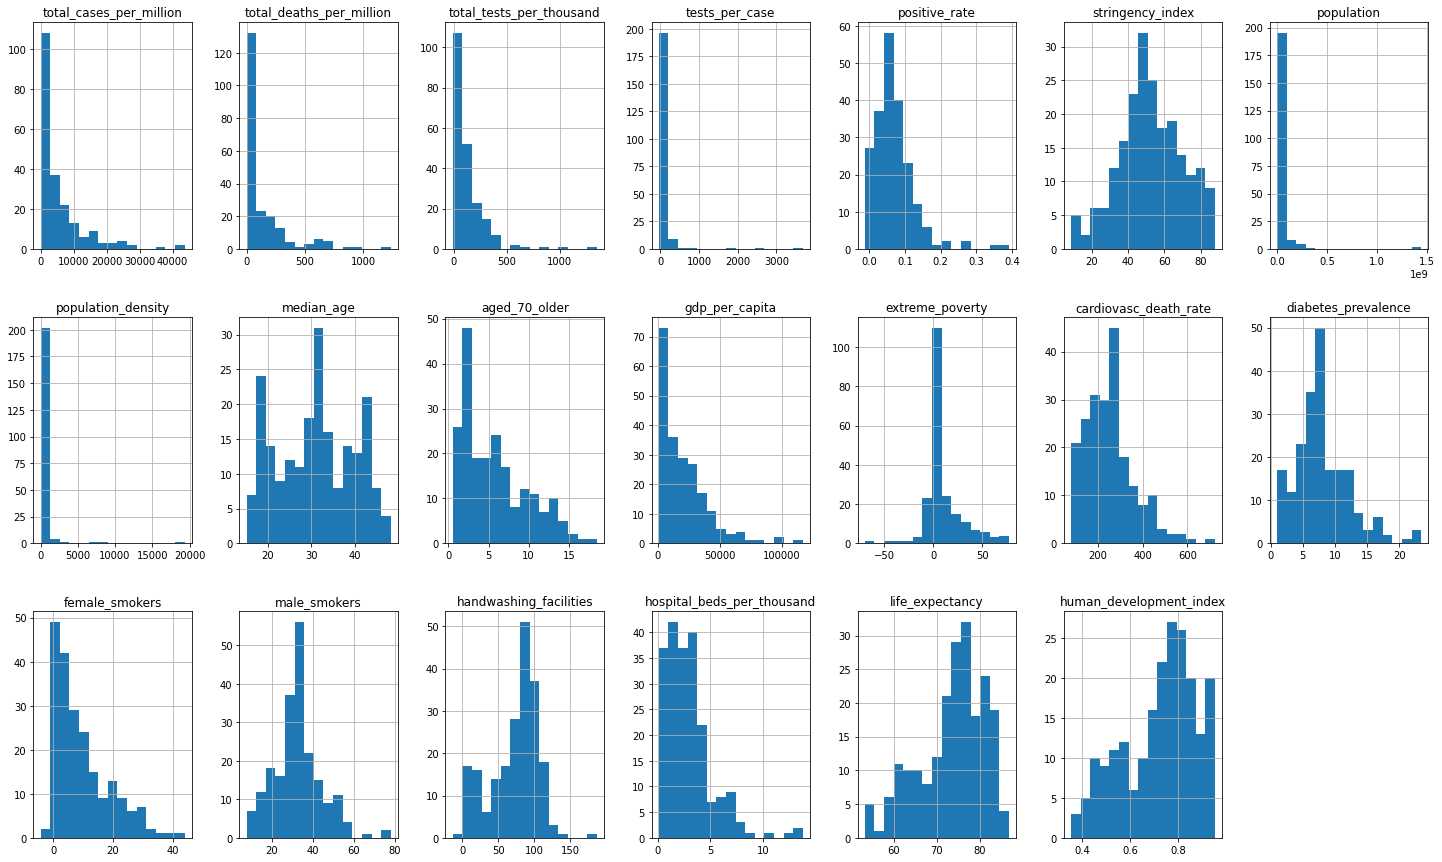

In [8]:
categorical = np.array(data.columns)
data[categorical].hist(bins=15, figsize=(25, 15), layout=(3, 7))

In [9]:
from sklearn import preprocessing


x = data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data = pd.DataFrame(x_scaled, columns=data.columns)

In [10]:
data.describe()

,total_cases_per_million,total_deaths_per_million,total_tests_per_thousand,tests_per_case,positive_rate,stringency_index,population,population_density,median_age,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,0.128111,0.107658,0.099254,0.047495,0.202065,0.554393,0.025666,0.018689,0.477569,0.290291,0.169290,0.540318,0.270704,0.316169,0.286346,0.355247,0.429306,0.208511,0.605209,0.614824
std,0.172200,0.159252,0.122261,0.090691,0.138039,0.221822,0.099011,0.079362,0.262244,0.223644,0.167423,0.132042,0.170861,0.182016,0.190468,0.161918,0.168173,0.165076,0.224256,0.250607
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.013442,0.012253,0.020320,0.020224,0.113682,0.424726,0.000716,0.002145,0.249245,0.091181,0.040770,0.475521,0.149716,0.201833,0.136224,0.262429,0.321340,0.092826,0.485285,0.425710
50%,0.063615,0.042106,0.062528,0.036584,0.177316,0.535529,0.004800,0.005013,0.490529,0.236489,0.128431,0.497205,0.260055,0.283415,0.219815,0.349697,0.483513,0.182482,0.650433,0.668614
75%,0.176337,0.145594,0.132957,0.046854,0.260958,0.709280,0.018174,0.012963,0.696375,0.451480,0.240599,0.580891,0.352786,0.406348,0.379893,0.427557,0.543260,0.270073,0.766283,0.801979
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


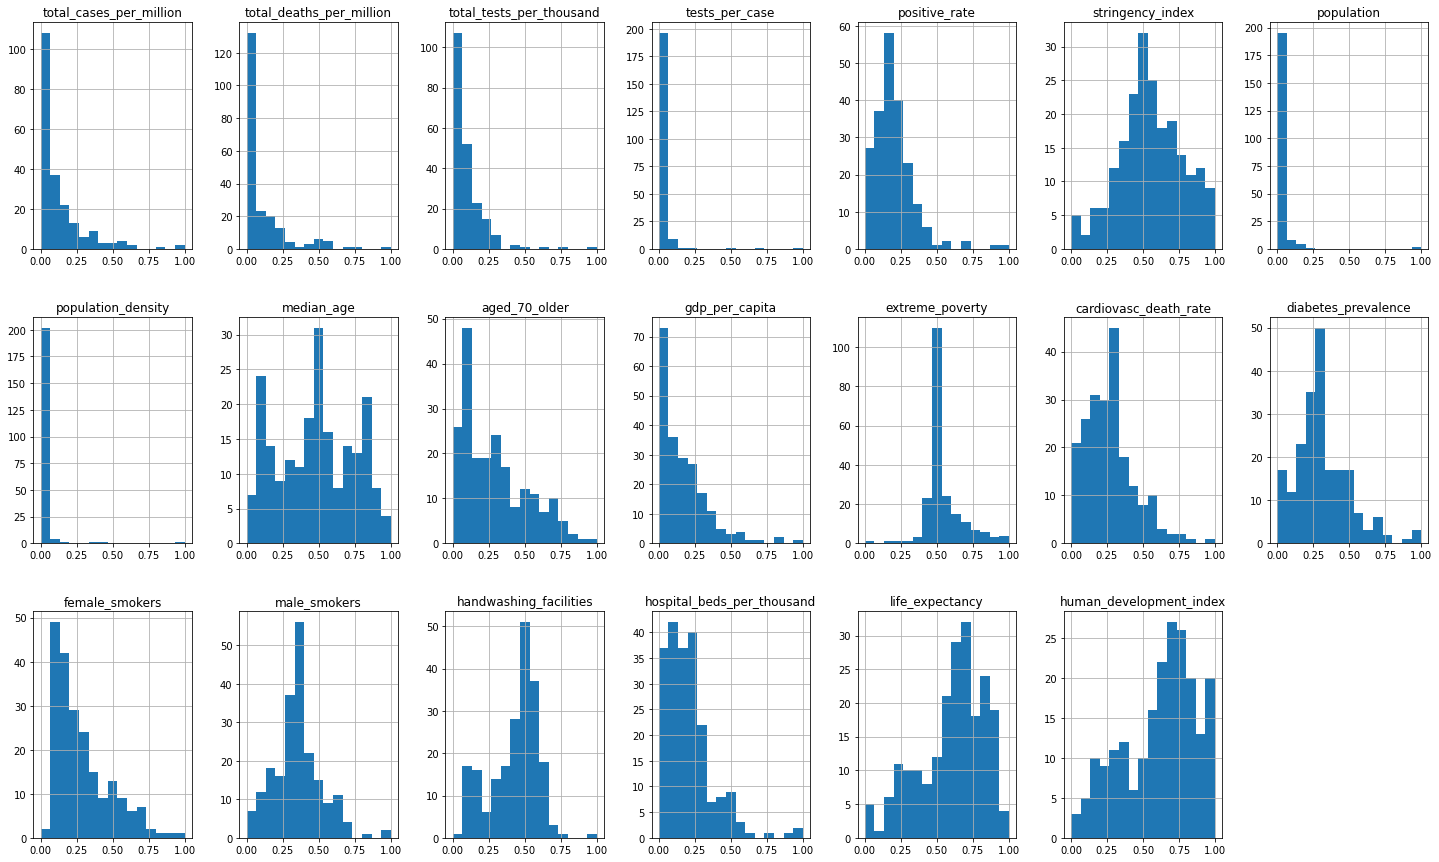

In [11]:
data[categorical].hist(bins=15, figsize=(25, 15), layout=(3, 7));

<AxesSubplot:>

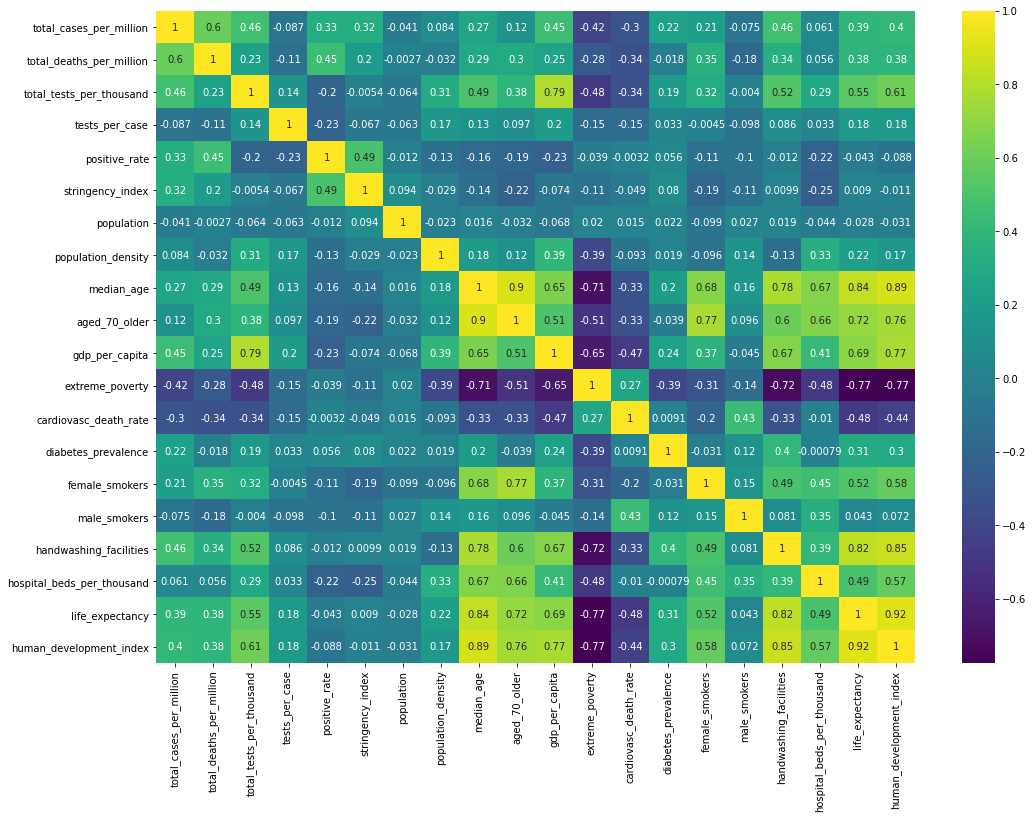

In [12]:
plt.figure(figsize=(17, 12))
sns.heatmap(data.corr(), annot=True, cmap='viridis')

In [13]:
data.to_csv("../data/processed/processed.csv", index=False)